# Exploratory Data Analysis (EDA)

The objective of this notebook is to explore statistical patterns in the Credit Card Fraud Detection dataset, compare fraudulent and legitimate transactions, and extract insights that directly inform preprocessing, modeling, and deployment decisions for a real-time fraud detection system.


In [2]:
# imports and configurations

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", None)
pd.set_option("display.width", 120)

In [3]:
# load the dataset 

DATA_PATH = '../data/raw/creditcard.csv'

df = pd.read_csv(DATA_PATH)

In [3]:
# target variable analysis 


class_counts = df['Class'].value_counts()
class_ratio = df['Class'].value_counts(normalize=True) * 100

class_counts, class_ratio

(Class
 0    284315
 1       492
 Name: count, dtype: int64,
 Class
 0    99.827251
 1     0.172749
 Name: proportion, dtype: float64)

## Class Distribution

Fraudulent transactions account for approximately **0.17%** of the dataset.

This confirms:
- Accuracy is not a meaningful evaluation metric
- Any naive classifier predicting "non-fraud" will appear highly accurate
- Recall, precision, and PR-AUC will be primary evaluation metrics

This imbalance reflects real-world fraud detection scenarios.


In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


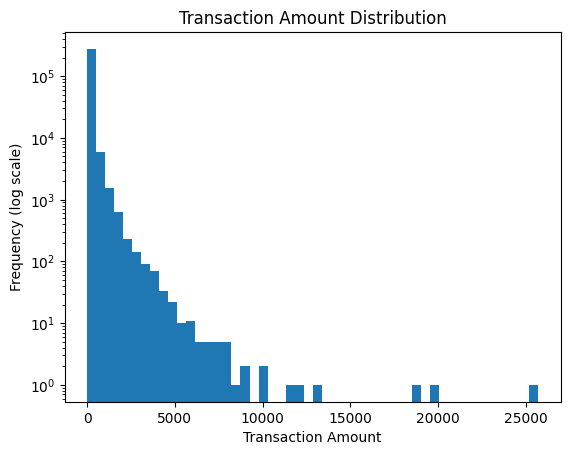

In [4]:
# Global distribution 

plt.figure()
plt.hist(df["Amount"], bins=50, log=True)
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency (log scale)")
plt.title("Transaction Amount Distribution")
save_path = "../reports/figures/00_transaction_amount_distribution.png"  
plt.savefig(save_path, dpi=300, bbox_inches='tight')
plt.show()

The transaction amount distribution is heavily right-skewed.
Log-scaling is required for meaningful visualization.

The raw `Amount` feature must be scaled before modeling.


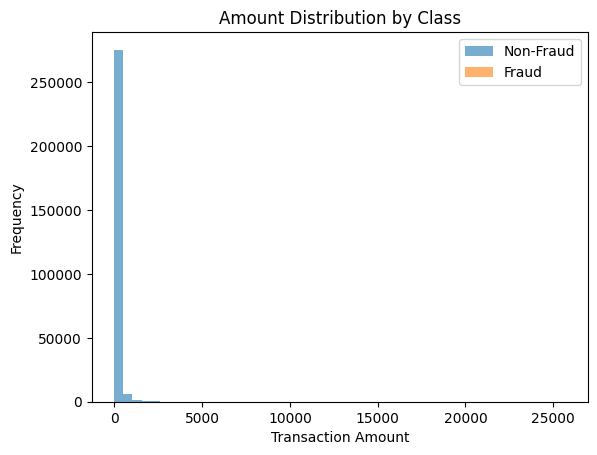

In [5]:
# fraud vs non-fraud amounts 

fraud = df[df["Class"] == 1]
non_fraud = df[df["Class"] == 0]

plt.figure()
plt.hist(non_fraud["Amount"], bins=50, alpha=0.6, label="Non-Fraud")
plt.hist(fraud["Amount"], bins=50, alpha=0.6, label="Fraud")
plt.legend()
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.title("Amount Distribution by Class")
save_path = "../reports/figures/01_amount_distribution_by_class.png"  
plt.savefig(save_path, dpi=300, bbox_inches='tight')
plt.show()

Fraudulent transactions tend to cluster at lower transaction amounts,
but there is significant overlap with legitimate transactions.

Conclusion:
- `Amount` alone is not discriminative
- It must be interpreted in combination with other features


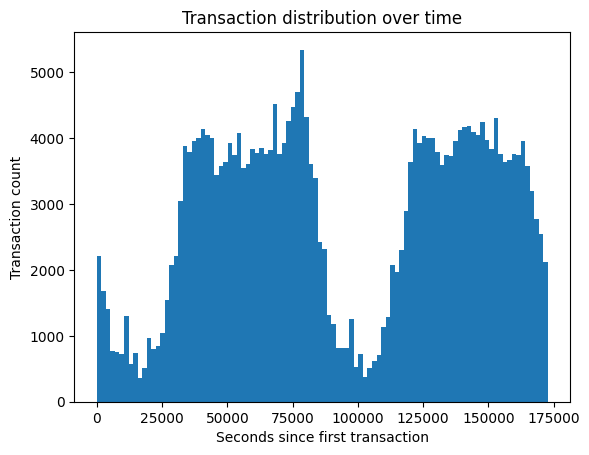

In [6]:
# distribution over dataset window 

plt.figure()
plt.hist(df["Time"], bins=100)
plt.xlabel("Seconds since first transaction")
plt.ylabel("Transaction count")
plt.title("Transaction distribution over time")
save_path = "../reports/figures/02_transaction_distribution_over_time.png"  
plt.savefig(save_path, dpi=300, bbox_inches='tight')
plt.show()

Transactions are unevenly distributed across the time window,
indicating periods of higher transaction density.

The `Time` feature does not represent real timestamps but may encode
transaction burst patterns.


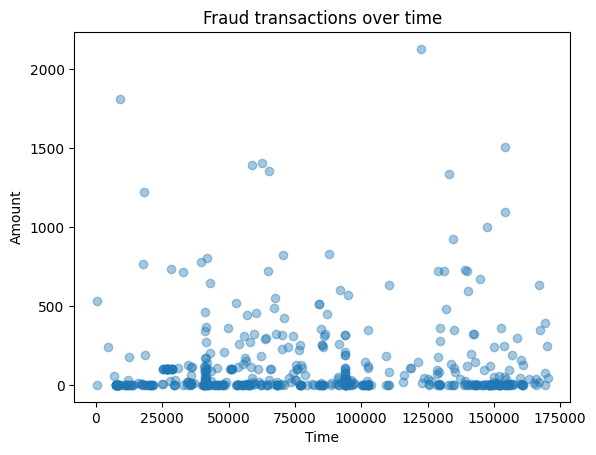

In [7]:
# fraud occurrence over time 

plt.figure()
plt.scatter(fraud["Time"], fraud["Amount"], alpha=0.4)
plt.xlabel("Time")
plt.ylabel("Amount")
plt.title("Fraud transactions over time")
save_path = "../reports/figures/03_fraud_transactions_over_time.png"  
plt.savefig(save_path, dpi=300, bbox_inches='tight')
plt.show()

Fraud occurs throughout the observation window without a single dominant burst.
Time-based features may provide weak signals but should not be discarded.


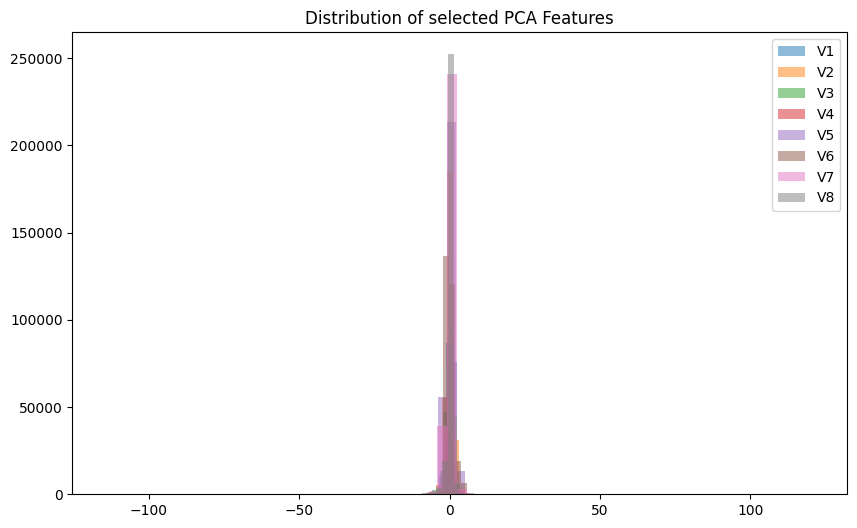

In [8]:
# PCA Feature Sanity Check 

selected_features = ["V1", "V2", "V3", "V4", "V5", "V6", "V7", "V8"]

plt.figure(figsize=(10,6))
for feature in selected_features:
  plt.hist(df[feature], bins=50, alpha=0.5, label=feature)

plt.legend()
plt.title("Distribution of selected PCA Features")
save_path = "../reports/figures/04_distribution_of_selected_PCA_features.png"  
plt.savefig(save_path, dpi=300, bbox_inches='tight')
plt.show()

The PCA-transformed features are approximately centered and scaled,
as expected from standardized principal components.

Given anonymization:
- Feature interpretability is limited
- Feature engineering opportunities are constrained
- Models must rely on statistical separation, not semantics

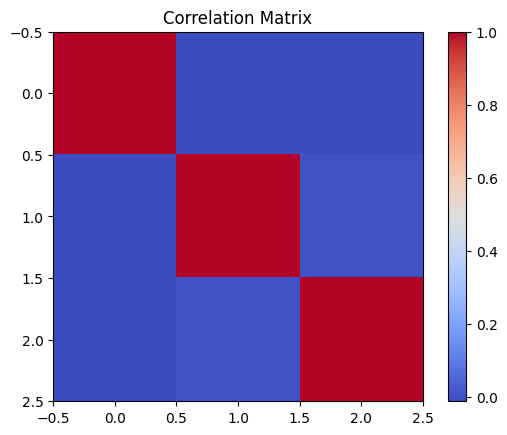

In [9]:
# linear correlation check 

corr = df[["Time", "Amount", "Class"]].corr()

plt.figure()
plt.imshow(corr, cmap="coolwarm")
plt.colorbar()
plt.title("Correlation Matrix")
save_path = "../reports/figures/05_correlation_matrix_of_features.png"  
plt.savefig(save_path, dpi=300, bbox_inches='tight')
plt.show()

Linear correlations between individual features and the fraud label are weak.
This suggests that non-linear models and ensembles will likely outperform
simple linear classifiers.

## EDA Summary and Modeling Implications

Key observations:
- Extreme class imbalance is the dominant challenge
- Fraudulent and legitimate transaction distributions overlap heavily
- Transaction amount and time provide weak but complementary signals
- PCA features remove interpretability but retain discriminative power

Modeling implications:
- Imbalance handling is mandatory
- Threshold tuning will be required
- Ensemble and non-linear models are justified
- Evaluation must prioritize recall, precision, and PR-AUC

These findings directly inform preprocessing and model design decisions
in subsequent notebooks.